In [45]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
#### Load the penguins_size dataset 
penguins_df = pd.read_csv('penguins_size.csv', delimiter=',', skipinitialspace=True)

### Data Cleansing
#### Clean the data

#### Remove rows with missing data 
Remove any rows with Na values and the row with a "." value for sex

In [47]:
penguins_df = penguins_df.dropna()
penguins_df = penguins_df[penguins_df["sex"] != "."]

#### Change column data types
Check each column data type then change flipper length and body mass data types to numpy's int64.

In [48]:
penguins_df.info()
penguins_df['flipper_length_mm'] = penguins_df['flipper_length_mm'].astype(np.int64)
penguins_df['body_mass_g'] = penguins_df['body_mass_g'].astype(np.int64)

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


#### Remove any duplicate rows

In [49]:
penguins_df = penguins_df.drop_duplicates()

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which species has the most body mass? 

Text(0, 0.5, 'Mean Body Mass (g)')

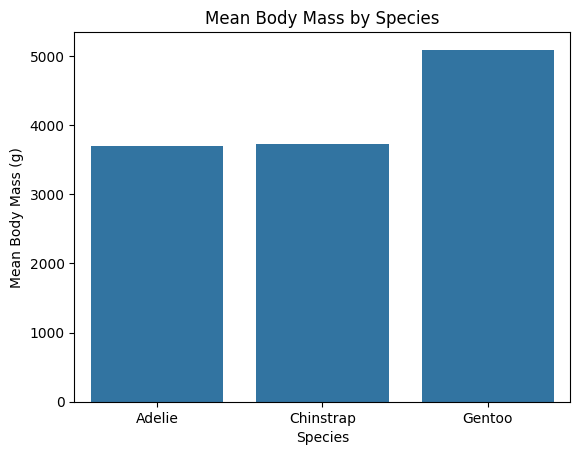

In [50]:
mean_body_mass = penguins_df.groupby('species')['body_mass_g'].mean().reset_index()

sns.barplot(x='species', y='body_mass_g', data=mean_body_mass)
plt.title('Mean Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Mean Body Mass (g)')


We can see that the species with the most mean body mass is by far Gentoo penguins with around 5000 grams average while Adelie and Chinstrap penguins have roughly the same average body mass with just under 4000 grams.

#### What is the top populated island? 

Text(0, 0.5, 'Penguins count')

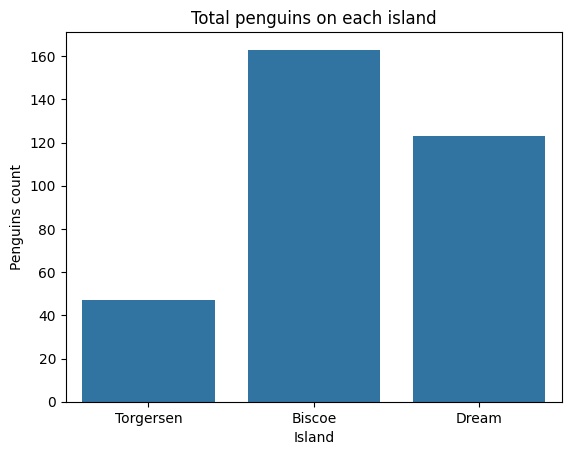

In [51]:
sns.countplot(x='island', data=penguins_df)
plt.title('Total penguins on each island')
plt.xlabel('Island')
plt.ylabel('Penguins count')

From this dataset we can see that Biscoe is the most populated Island for penguins at around 160 penguins followed by Dream and then Torgersen with roughly 120 and 50 penguins.

#### Examine the relationship between culmen depth and culmen length for each species and which islands the species are from.

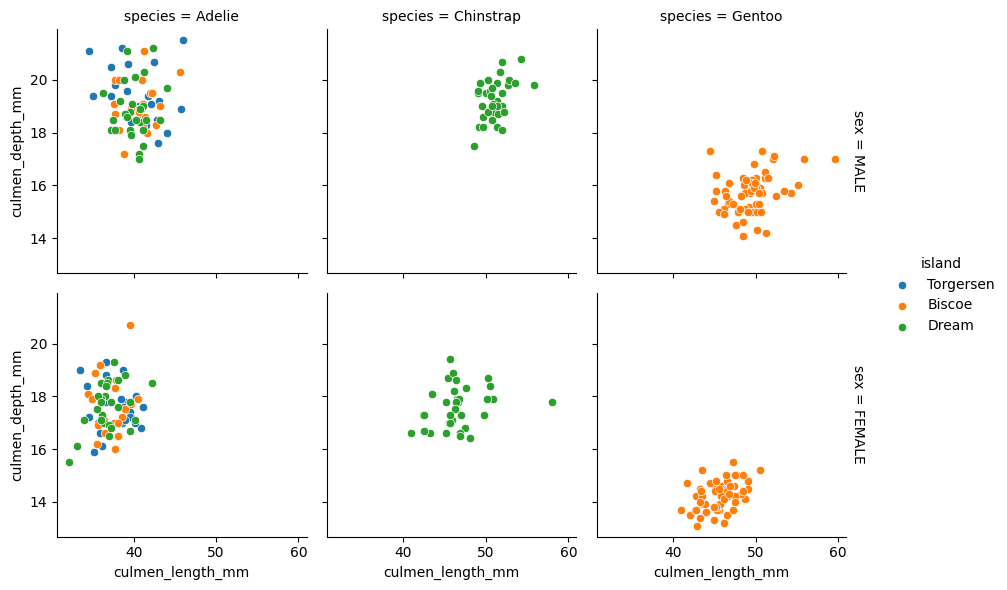

In [52]:
fg = sns.FacetGrid(penguins_df, row="sex", col="species", hue="island",
margin_titles=True)
fg.map_dataframe(sns.scatterplot, x="culmen_length_mm", y="culmen_depth_mm")
fg.add_legend()


This multigrid tells us that for the most of the penguins, males have bigger culmen lengths and depths than females do. We can see that Adelie penguins inhabit all three islands including Torgersen-, Biscoe- and Dream island while Chinstrap penguins only inhabit Dream island and Gentoo penguins only inhabit Biscoe island. For all three penguin species, there is a positive relationship between culmen length and culmen depth.

#### Showcase the flipper length distribution

Text(0.5, 0, 'flipper length')

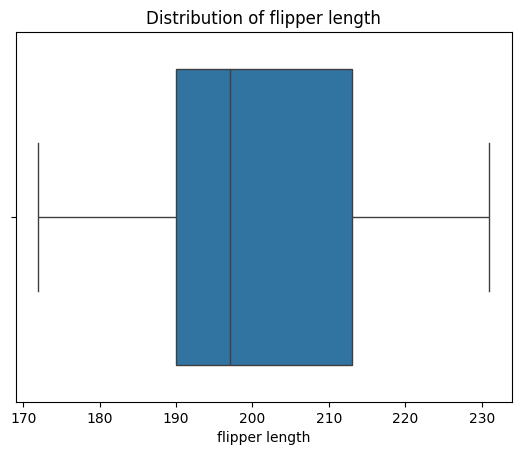

In [53]:
sns.boxplot(data=penguins_df, x='flipper_length_mm')
plt.title('Distribution of flipper length')
plt.xlabel('flipper length')

This box plot tells us that most of penguin's flipper length are between the lengths of roughly 190 and 215 mm.